In [1]:
######################
#import useful modules
######################

import sys

sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

import gsw

from Modules import *
#from Modules_gula import *

import numpy.ma as ma
import scipy.stats as st
#import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
########

%matplotlib inline

In [2]:
# Load simul files

simul = load(simul = 'swag_clim', output=True);
simul.mask[simul.mask==0] = np.nan


simulname is None
args (['swag_clim'],)
args[0] ['swag_clim']
len(args[0]) 1
time of simulation is: 0
file opened in oceandate
file closed in oceandate
coord
loading /data0/project/vortex/penven/SWAG/swag362_avg_ANN_clim.nc
file opened in get_domain
get domain [0,100000,0,100000,[1,1000,1]] [0,10
file closed in get_domain
coordmax
loading /data0/project/vortex/penven/SWAG/swag362_avg_ANN_clim.nc
file opened in get_domain
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
file closed in get_domain
cst
file opened in cst
read Cs_r in ncfile.variables
file closed in cst
dt
file opened in dt
dt is read in  /data0/project/vortex/penven/SWAG/swag362_avg_ANN_clim.nc
dt is  0
file closed in dt
[0, 1682, 0, 2562, array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 

In [3]:
# Load (or compute) w at bottom model level (depths=[1]):

w = var('w',simul, depths=[1]).data


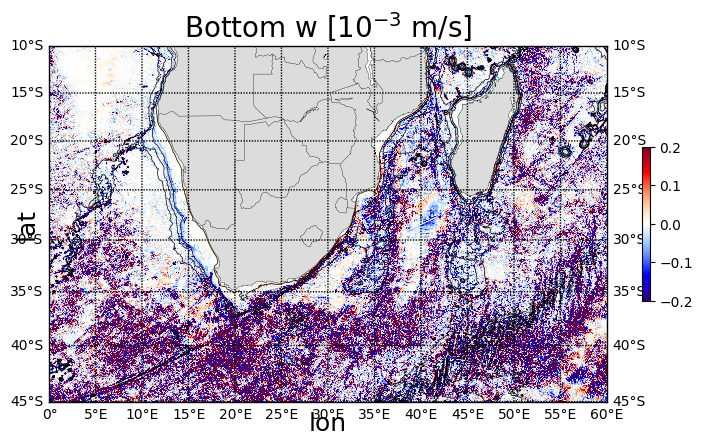

In [27]:
# Plot map

def plot_map(ax1, simul, w, zoom=None, deg=5, topo_contours=[100,1000,2000,3000]):
    
    if zoom is not None:
        
        lon = simul.x; lat = simul.y
        map = Basemap(projection='mill',
                llcrnrlat = zoom[2],
                llcrnrlon = zoom[0],
                urcrnrlat = zoom[3],
                urcrnrlon = zoom[1],
                resolution='l')    
    else:
        
        lon = simul.x; lat = simul.y
        map = Basemap(projection='ortho',lat_0=np.mean(simul.y),lon_0=np.mean(simul.x),\
                  resolution='l')
        
    # draw coastlines, country boundaries, fill continents.
    map.drawcoastlines(linewidth=0.25)
    map.drawcountries(linewidth=0.25)
    #map.fillcontinents(color='coral''Gainsboro',lake_color='aqua')
    map.fillcontinents(color='Gainsboro',lake_color='white')
    # draw the edge of the map projection region (the projection limb)
    map.drawmapboundary(fill_color='aqua')
    #map.drawmapboundary(fill_color='Gainsboro')
    # draw lat/lon grid lines every 30 degrees.

    if zoom is not None:
        map.drawmeridians(np.arange(-180,180,deg),labels=[True,True,False,True])
        map.drawparallels(np.arange(-90,90,deg),labels=[True,True,False,True])
    else:
        map.drawmeridians(np.arange(-180,180,30),labels=[True,False,False,True])
        map.drawparallels(np.arange(-90,90,30),labels=[False,True,True,False])  
    ###

    CS1 = map.pcolormesh(lon,lat,w*1e3,\
                   cmap = plot.ncview_colormap('blu_red'),vmin=-2e-1,vmax=2e-1,\
                   latlon=True);
    
    plt.colorbar(CS1,shrink=0.25)
    
    CS1 = map.contour(lon,lat,simul.topo,topo_contours,\
                      colors = ('k',), linewidths = (.5,),
                      latlon=True); 
    #plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

    plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
    plt.title('Bottom w [$10^{-3}$ m/s]', fontsize=20)

        
#################################################

zoom = [0,60,-45,-10]

##################################
fig = plt.figure(figsize=(9.0,8.0)) 
ax1 = plt.subplot(1,1,1);
plot_map(ax1, simul, w*simul.mask, zoom=zoom)


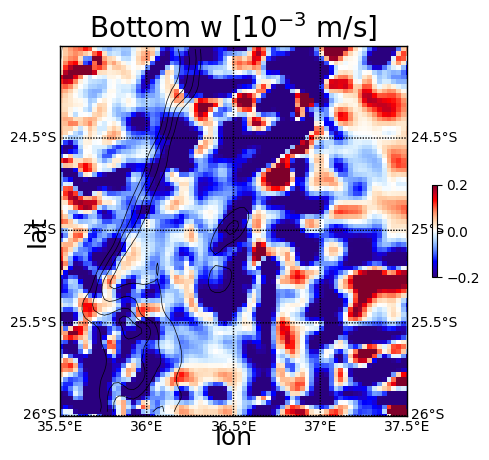

In [31]:
zoom = [35.5,37.5,-26,-24]

plot_map(ax1, simul, w*simul.mask, zoom=zoom,\
         deg=0.5, topo_contours=np.arange(1600,2000,100))


'Warning: Cannot label meridians on full-disk
Geostationary, Orthographic or Azimuthal equidistant basemapWarning: Cannot label parallels on Orthographic basemap

/tmp/ipykernel_1694001/4217821539.py:38: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  CS1 = map.pcolormesh(lon,lat,w*1e3,\


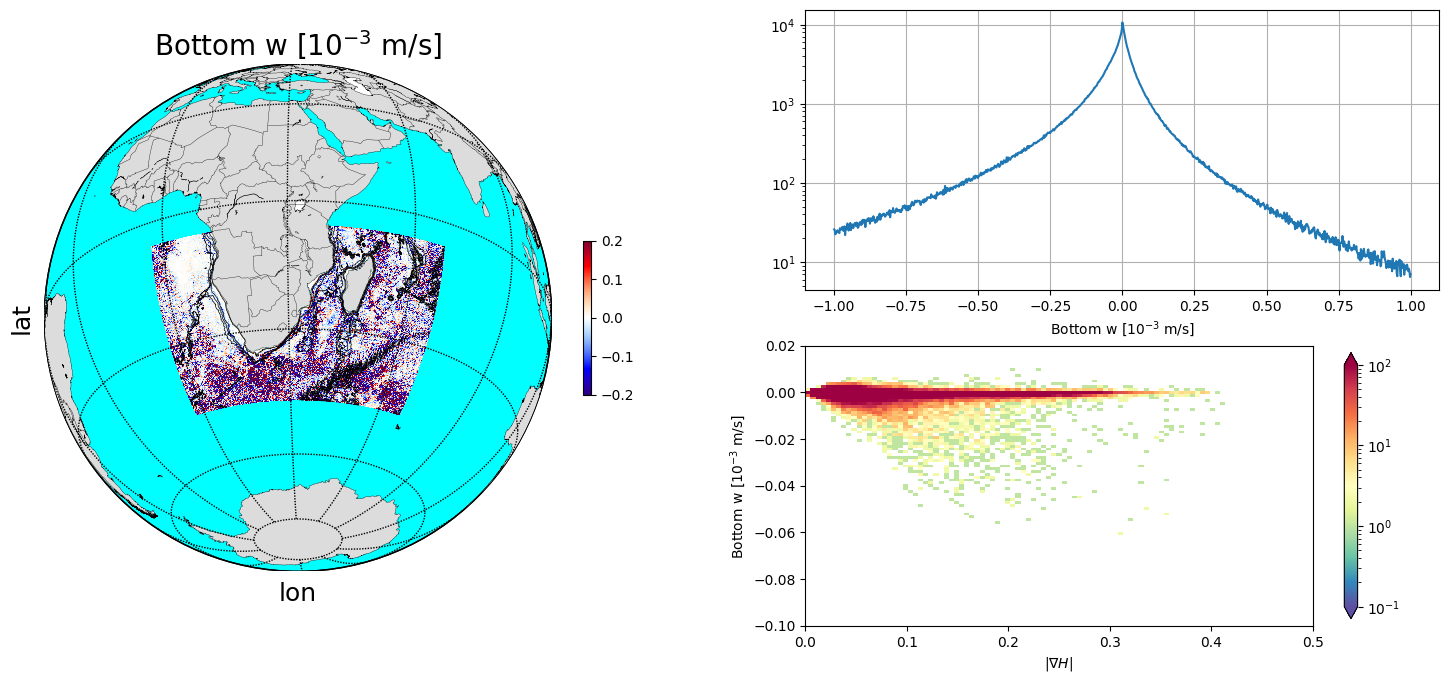

In [32]:
# Plot w as a function of slope
#################################################

def mypdf(u,bins):
    
    pdf,_ = np.histogram(u,bins)
    pdf =pdf/((bins[2]-bins[1])*len(u))
    return pdf

#################################################

#zoom = [-70,-20,-60,-20]
#cond = np.where(np.logical_and.reduce((simul.mask==1,\
#                                       np.logical_and(lon>zoom[0],lon<zoom[1]),\
#                                       np.logical_and(lat>zoom[2],lat<zoom[3]))))

cond = np.where(simul.mask==1)

w_filter = np.copy(w)*np.nan
w_filter[cond] = w[cond]
wpdf = mypdf(w[cond],bins)

topograd = tools.psi2rho(tools.grad(simul.topo,simul.pm,simul.pn))
levelsvar = np.linspace(-1e-1,1e-1,100)

#################################################

fig = plt.figure(figsize=(18.0,8.0)) 
ax1 = plt.subplot(1,2,1);

plot_map(ax1, simul, w*simul.mask)
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)

################

ax1 = plt.subplot(2,2,2);

plt.semilogy(0.5*(bins[:-1]+bins[1:])*1e3,wpdf)
plt.grid()
plt.xlabel('Bottom w [$10^{-3}$ m/s]')

################

ax1 = plt.subplot(2,2,4);

bins2d = [np.linspace(0.,0.5,100),np.linspace(-0.1,0.02,100)]
H, xedges, yedges, _ = st.binned_statistic_2d(topograd[cond], w[cond], \
                                              w[cond], 'count', bins=bins2d)
H = np.rot90(H); H = np.flipud(H)
Hmasked = np.ma.masked_where(H<=0.001,H)
plt.pcolormesh(xedges,yedges, Hmasked,  norm=col.LogNorm(vmin=.1, vmax=100.), \
               cmap=plt.cm.Spectral_r, edgecolors='none', alpha=1.)

cbar = plt.colorbar(extend='both', shrink=0.95)

plt.xlabel(r'$\| \nabla H \|$')
plt.ylabel('Bottom w [$10^{-3}$ m/s]')


#################################################

plt.savefig(simul.simul + '_map_wbot.png', bbox_inches='tight',\
            transparent='true', dpi=200)


In [35]:
# Load u,v at bottom model level (depths=[1]):

u = var('u',simul, depths=[1]).data
v = var('v',simul, depths=[1]).data


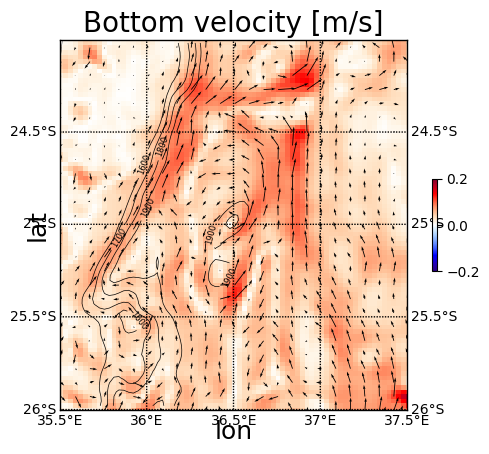

In [48]:

def plot_map_uv(ax1, simul, u,v , zoom=None, deg=5, dvec=10, topo_contours=[100,1000,2000,3000]):
    
    """
    Plot velocity vectors on a map with optional zoom.

    Parameters:
    - ax1: Matplotlib axis object
    - simul: Simulation object containing x, y, and topo data
    - u, v: Velocity components
    - zoom: Optional tuple (lon_min, lon_max, lat_min, lat_max) for zooming
    - deg: Degree spacing for latitude/longitude grid
    - topo_contours: Contour levels for topography
    """
    
    ###
    # Compute vel. amplitude on rho grid
    
    u = tools.u2rho(u)
    v = tools.v2rho(v)
    uv = np.sqrt(u**2 + v**2)
    
    ###
    
    lon = simul.x
    lat = simul.y
    
    if zoom is not None:
        map = Basemap(projection='mill',
                llcrnrlat = zoom[2],
                llcrnrlon = zoom[0],
                urcrnrlat = zoom[3],
                urcrnrlon = zoom[1],
                resolution='l')    
    else:
        map = Basemap(projection='ortho',
                      lat_0=np.mean(simul.y),
                      lon_0=np.mean(simul.x),
                      resolution='l')
        
    # draw coastlines, country boundaries, fill continents.
    map.drawcoastlines(linewidth=0.25)
    map.drawcountries(linewidth=0.25)
    #map.fillcontinents(color='coral''Gainsboro',lake_color='aqua')
    map.fillcontinents(color='Gainsboro',lake_color='white')
    # draw the edge of the map projection region (the projection limb)
    map.drawmapboundary(fill_color='aqua')
    
    # Draw lat/lon grid lines
    if zoom is not None:
        map.drawmeridians(np.arange(-180,180,deg),labels=[True,True,False,True])
        map.drawparallels(np.arange(-90,90,deg),labels=[True,True,False,True])
    else:
        map.drawmeridians(np.arange(-180,180,30),labels=[True,False,False,True])
        map.drawparallels(np.arange(-90,90,30),labels=[False,True,True,False])  
    
    # Plot velocity amplitude
    CS1 = map.pcolormesh(lon,lat,uv,\
                   cmap = plot.ncview_colormap('blu_red'),vmin=-2e-1,vmax=2e-1,\
                   latlon=True);
    
    plt.colorbar(CS1,shrink=0.25)
    
    # Plot topography contours
    CS1 = map.contour(lon,lat,simul.topo,topo_contours,\
                      colors = ('k',), linewidths = (.5,),
                      latlon=True); 
    plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 
    
    # Plot velocity vectors
    map.quiver(lon[::dvec,::dvec], lat[::dvec,::dvec],
               u[::dvec,::dvec]  , v[::dvec,::dvec],
               latlon=True, scale=2)

    plt.xlabel(r'lon',fontsize=18); 
    plt.ylabel(r'lat',fontsize=18)
    plt.title('Bottom velocity [m/s]', fontsize=20)

    
#######################
    
zoom = [35.5,37.5,-26,-24]

plot_map_uv(ax1, simul, u, v, zoom=zoom,\
         deg=0.5, topo_contours=np.arange(1600,2000,100), dvec=3)
